In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#房价预测。 ex1data2.txt：面积、卧室数、房价
# In this part, you will implement linear regression with multiple variables to
# predict the prices of houses. Suppose you are selling your house and you
# want to know what a good market price would be. One way to do this is to
# first collect information on recent houses sold and make a model of housing
# prices.
# The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
# 假设现在卖房子，想知道买了多少钱？

In [3]:
#读取文件
data = pd.read_csv('ex1data2.txt', names=['size', 'bedrooms', 'price'])
data.head()


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
#特征归一化：消除特征值之间的量纲的影响，各特征值处于同一数量级。提升模型的精度
def normalize(data):
    return (data - data.mean()) / data.std()

In [5]:
data = normalize(data)

In [6]:
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


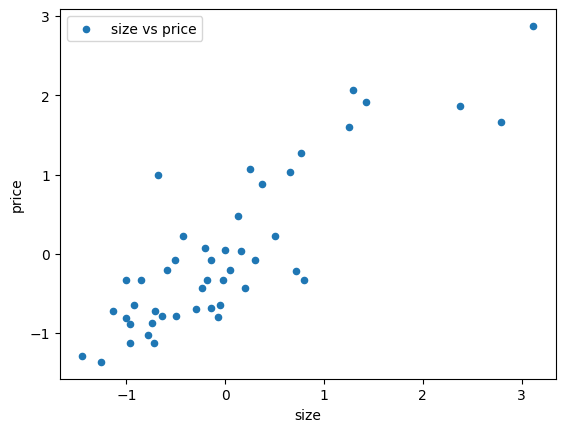

In [7]:
data.plot.scatter(x='size', y='price', label='size vs price')
plt.show()

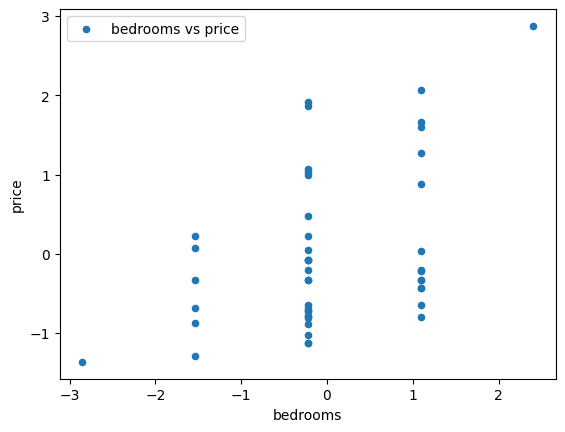

In [8]:
data.plot.scatter(x='bedrooms', y='price', label='bedrooms vs price')
plt.show()

In [9]:
#添加全为1的列
data.insert(0, 'ones', 1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [10]:
#构造数据集
X = data.iloc[:, 0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [11]:
y = data.iloc[:, -1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [12]:
#为了方便运算，将dataframe转为数组格式
X = X.values

In [13]:
X.shape

(47, 3)

In [14]:
y = y.values

In [15]:
y.shape

(47,)

In [16]:
y = y.reshape(47, 1)

In [17]:
y.shape

(47, 1)

In [19]:
#损失函数
def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)  #这里的X是矩阵，所以不用担心单变量或多变量问题
    return np.sum(inner) / (2 * len(X))

In [20]:
theta = np.zeros((3, 1))

In [22]:
cost_init = costFunction(X, y, theta)
print('Cost function:', cost_init)

Cost function: 0.4893617021276595


In [27]:
#梯度下降更新theta
def gradientDescent(X, y, theta, alpha, iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)

        if i % 100 == 0:
            print(cost)

    return theta, costs

In [28]:
#不同alpha下的效果
all_alpha = [0.0003, 0.003, 0.03, 0.0001, 0.001, 0.01]
iters = 2000

0.48909548256102436
0.4635902331657032
0.44016821475663215
0.4186508535071945
0.39887511309398144
0.38069213679771036
0.3639660084316407
0.3485726216951538
0.3343986484608999
0.32134059733491166
0.3093039545873275
0.2982024002432156
0.2879570927542748
0.27849601624819187
0.26975338487801676
0.26166909927347387
0.2541882505337031
0.2472606676001874
0.24084050421292977
0.23488586198535077
0.48670463263687064
0.308056670352668
0.22870462926315133
0.19082529270137932
0.1709160958940547
0.1592719017108704
0.15176949308410234
0.14657083679144334
0.14279396721170182
0.1399723789282826
0.13783149977689782
0.13619351004826175
0.13493475667239407
0.13396521055587873
0.1332175312668491
0.1326405902968557
0.13219525534466406
0.13185144867103776
0.13158600087298825
0.13138104364243763
0.4633036247760585
0.13755547027220208
0.1311947183255001
0.1307241965818779
0.1306892794350177
0.13068668824425503
0.1306864959527822
0.13068648168289088
0.13068648062392663
0.13068648054534124
0.1306864805395094
0.1

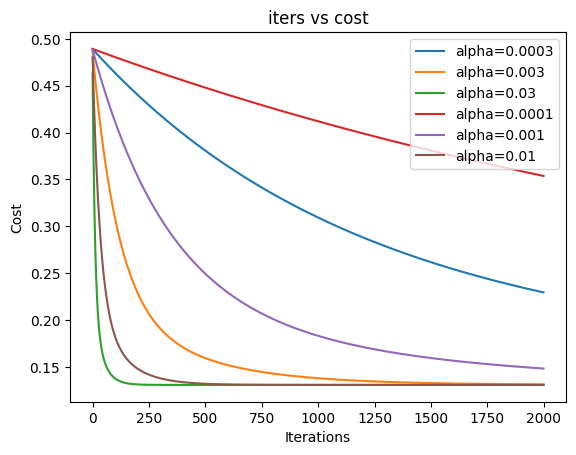

In [31]:
fig, ax = plt.subplots()
for alpha in all_alpha:
    _, costs = gradientDescent(X, y, theta, alpha, iters)  #因为这里画图不需要theta所以使用下划线去掉
    ax.plot(np.arange(iters), costs, label=f'alpha={alpha}')
    ax.legend()

ax.set(xlabel='Iterations', ylabel='Cost', title='iters vs cost')
plt.show()

由图像来看，下面三个图像下降快，迭代次数挺好的